In [1]:
import os
import torch
import pandas as pd
import numpy as np
import transformers
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from tqdm import tqdm
from transformers import RobertaTokenizer, AutoModel, RobertaModel
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
import sys
sys.path.append('/content/drive/MyDrive/skripsi')
!ls /content/drive/MyDrive/skripsi


 app.py			        finetuning_RoBERTa3.ipynb
 check_lang.py		        finetuning_RoBERTa.ipynb
 cluster_sinta2.ipynb	        functions.py
 cluster_sinta.ipynb	        model
'Copy of cluster_sinta.ipynb'   predict_multibert_kmeans_finetuned.ipynb
'Copy of Untitled0.ipynb'       Preprocessing_data_sinta.ipynb
 data			        Preprocessing.py
 finetuned_multibert2.ipynb     __pycache__
 finetuned_pipeline.py	        src
 finetuning.py		        Untitled0.ipynb
 finetuning_RoBERTa2.ipynb      Untitled1.ipynb


In [2]:
from Preprocessing import preprocess_text

In [3]:
df = pd.read_csv('/content/drive/MyDrive/skripsi/data/data_sinta_cleaned3.csv')
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)
df

,jid,desc,title,date,journal,data_cleaned,eissn
0,1,Belakangan ini Lembaga PAUD berbondong-bondong...,Kemampuan Bahasa Inggris Awal pada Periode Lin...,2023-10-05,JURNAL OBSESI: JURNAL PENDIDIKAN ANAK USIA DINI,kemampuan bahasa inggris awal pada periode lin...,2549-8959
1,1,The assessment process carried out in schools ...,Strengthening Early Childhood Learning Outcome...,2022-06-09,JURNAL OBSESI: JURNAL PENDIDIKAN ANAK USIA DINI,strengthening early childhood learning outcome...,2549-8959
2,1,Kewajiban guru PAUD untuk memberikan layanan b...,Eksplorasi Deskriptif tentang Layanan Bimbinga...,2023-06-07,JURNAL OBSESI: JURNAL PENDIDIKAN ANAK USIA DINI,eksplorasi deskriptif tentang layanan bimbinga...,2549-8959
3,1,Pandemi Covid-19 merambah sejak awal tahun 202...,Perspektif Orang Tua terhadap Pelaksanaan Les ...,2021-06-02,JURNAL OBSESI: JURNAL PENDIDIKAN ANAK USIA DINI,perspektif orang tua terhadap pelaksanaan les ...,2549-8959
4,1,Dalam upaya mencapai Sustainable Development G...,Strategi Pencegahan dan Penanganan Stunting Mu...,2023-12-26,JURNAL OBSESI: JURNAL PENDIDIKAN ANAK USIA DINI,strategi pencegahan dan penanganan stunting mu...,2549-8959
...,...,...,...,...,...,...,...
9859,12,The purpose of this study to examine the effec...,"PENGARUH KINERJA KEUANGAN, DANA ALOKASI UMUM D...",2017-05-15,E-JURNAL AKUNTANSI,pengaruh kinerja keuangan dana alokasi umum da...,2302-8556
9860,12,The level of understanding of accounting to be...,"PENGARUH KECERDASAN EMOSIONAL, KECERDASAN INTE...",2017-08-06,E-JURNAL AKUNTANSI,pengaruh kecerdasan emosional kecerdasan intel...,2302-8556
9861,12,The purpose of this study was to examine the i...,"PENGARUH UKURAN PERUSAHAAN, KOMPLEKSITAS OPERA...",2017-02-15,E-JURNAL AKUNTANSI,pengaruh ukuran perusahaan kompleksitas operas...,2302-8556
9862,12,The purpose of this study is to determine the ...,KINERJA DINAS PARIWISATA BALI BERDASARKAN KONS...,2016-11-10,E-JURNAL AKUNTANSI,kinerja dinas pariwisata bali berdasarkan kons...,2302-8556


In [4]:
df[df.data_cleaned.isna()]

,jid,desc,title,date,journal,data_cleaned,eissn


In [5]:
title_unik = list(df.journal.unique())
title_unik

['JURNAL OBSESI: JURNAL PENDIDIKAN ANAK USIA DINI',
 'JURNAL CENDEKIA : JURNAL PENDIDIKAN MATEMATIKA',
 'INTERNATIONAL JOURNAL OF ELEMENTARY EDUCATION',
 'JURNAL BISNIS DAN AKUNTANSI',
 'JURNAL AKUNTANSI DAN KEUANGAN',
 'JURNAL PENDIDIKAN TEKNIK MESIN UNDIKSHA',
 'INTERNATIONAL JOURNAL OF BASIC AND APPLIED SCIENCE',
 'JURNAL KESEHATAN MASYARAKAT',
 'GADJAH MADA INTERNATIONAL JOURNAL OF BUSINESS',
 'JURNAL KESEHATAN ANDALAS',
 'E-JOURNAL OF CULTURAL STUDIES',
 'E-JURNAL AKUNTANSI']

In [6]:
df.data_cleaned[0]

'kemampuan bahasa inggris awal pada periode linguistik anak usia dini belakangan ini lembaga paud berbondongbondong memberikan pembelajaran bahasa inggris bagi anak diperiode linguistik penelitian ini bertujuan untuk mengetahui kemampuan awal anak dalam mendengarkan dan mengucapkan kosakata bahasa inggris pada periode linguistic penelitian ini merupakan penelitian deskriptif dengan menggunakan pendekatan kuantitatif populasi penelitian ini mencakup anak pada taman kanakkanak selanjutnya peneliti melakukan penarikan sampling dengan teknik sampling jenuh dengan jumlah  anak penelitian ini dilakukan pada bulan september   maret  dengan bekerjasama dengan guru kelas kegiatan pengumpulan data penelitian ini dilakukan melalui observasi dengan model partisipatif adapun deskripsi hasil penelitian ini dibagi menjadi dua yakni kemampuan mendengarkan kosakata bahasa inggris awal yakni dengan kategori mulai berkembang selanjutnya kemampuan mengucapkan kosakata bahasa inggris awal berada pada kateg

In [7]:
df['jid_umum'] = df['jid']
df['jid_umum'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [8]:
journal_id = {title_unik[i] : i + 1 for i in range(len(title_unik))}
df['jid'] = df.journal.apply(lambda x : journal_id[x])
df

,jid,desc,title,date,journal,data_cleaned,eissn,jid_umum
0,1,Belakangan ini Lembaga PAUD berbondong-bondong...,Kemampuan Bahasa Inggris Awal pada Periode Lin...,2023-10-05,JURNAL OBSESI: JURNAL PENDIDIKAN ANAK USIA DINI,kemampuan bahasa inggris awal pada periode lin...,2549-8959,1
1,1,The assessment process carried out in schools ...,Strengthening Early Childhood Learning Outcome...,2022-06-09,JURNAL OBSESI: JURNAL PENDIDIKAN ANAK USIA DINI,strengthening early childhood learning outcome...,2549-8959,1
2,1,Kewajiban guru PAUD untuk memberikan layanan b...,Eksplorasi Deskriptif tentang Layanan Bimbinga...,2023-06-07,JURNAL OBSESI: JURNAL PENDIDIKAN ANAK USIA DINI,eksplorasi deskriptif tentang layanan bimbinga...,2549-8959,1
3,1,Pandemi Covid-19 merambah sejak awal tahun 202...,Perspektif Orang Tua terhadap Pelaksanaan Les ...,2021-06-02,JURNAL OBSESI: JURNAL PENDIDIKAN ANAK USIA DINI,perspektif orang tua terhadap pelaksanaan les ...,2549-8959,1
4,1,Dalam upaya mencapai Sustainable Development G...,Strategi Pencegahan dan Penanganan Stunting Mu...,2023-12-26,JURNAL OBSESI: JURNAL PENDIDIKAN ANAK USIA DINI,strategi pencegahan dan penanganan stunting mu...,2549-8959,1
...,...,...,...,...,...,...,...,...
9859,12,The purpose of this study to examine the effec...,"PENGARUH KINERJA KEUANGAN, DANA ALOKASI UMUM D...",2017-05-15,E-JURNAL AKUNTANSI,pengaruh kinerja keuangan dana alokasi umum da...,2302-8556,12
9860,12,The level of understanding of accounting to be...,"PENGARUH KECERDASAN EMOSIONAL, KECERDASAN INTE...",2017-08-06,E-JURNAL AKUNTANSI,pengaruh kecerdasan emosional kecerdasan intel...,2302-8556,12
9861,12,The purpose of this study was to examine the i...,"PENGARUH UKURAN PERUSAHAAN, KOMPLEKSITAS OPERA...",2017-02-15,E-JURNAL AKUNTANSI,pengaruh ukuran perusahaan kompleksitas operas...,2302-8556,12
9862,12,The purpose of this study is to determine the ...,KINERJA DINAS PARIWISATA BALI BERDASARKAN KONS...,2016-11-10,E-JURNAL AKUNTANSI,kinerja dinas pariwisata bali berdasarkan kons...,2302-8556,12


In [9]:
df.to_csv('/content/drive/MyDrive/skripsi/data/data_sinta_cleaned3.csv', index=False)

In [10]:
'''
1 'JURNAL OBSESI: JURNAL PENDIDIKAN ANAK USIA DINI',
2 'JURNAL CENDEKIA : JURNAL PENDIDIKAN MATEMATIKA',
3 'INTERNATIONAL JOURNAL OF ELEMENTARY EDUCATION',
4 'JURNAL BISNIS DAN AKUNTANSI',
5 'JURNAL AKUNTANSI DAN KEUANGAN',
6 'JURNAL PENDIDIKAN TEKNIK MESIN UNDIKSHA',
7 'INTERNATIONAL JOURNAL OF BASIC AND APPLIED SCIENCE',
8 'JURNAL KESEHATAN MASYARAKAT',
9 'GADJAH MADA INTERNATIONAL JOURNAL OF BUSINESS',
10 'JURNAL KESEHATAN ANDALAS',
11 'E-JOURNAL OF CULTURAL STUDIES',
12 'E-JURNAL AKUNTANSI'
 '''


jurnal_id = 1


data_jid = df[df['jid']==jurnal_id]
data = data_jid['data_cleaned']
data

,data_cleaned
0,kemampuan bahasa inggris awal pada periode lin...
1,strengthening early childhood learning outcome...
2,eksplorasi deskriptif tentang layanan bimbinga...
3,perspektif orang tua terhadap pelaksanaan les ...
4,strategi pencegahan dan penanganan stunting mu...
...,...
1842,pencapaian perkembangan anak usia dini di tama...
1843,colour ball based on microcontroller as a educ...
1844,pengembangan teknologi digital cerita sains te...
1846,pengaruh bimtek guru pembimbing khusus terhada...


In [11]:
class RobertaClassifier(nn.Module):
    def __init__(self, num_labels):
        super(RobertaClassifier, self).__init__()
        self.roberta = AutoModel.from_pretrained('roberta-base')
        self.classifier = nn.Sequential(
            nn.Linear(self.roberta.config.hidden_size, 300),
            nn.ReLU(),
            nn.Linear(300, 100),
            nn.ReLU(),
            nn.Linear(100, 50),
            nn.ReLU(),
            nn.Linear(50, num_labels)
        )

    def forward(self, input_ids, attention_mask):
        outputs = self.roberta(input_ids=input_ids, attention_mask=attention_mask)
        x = outputs['last_hidden_state']
        # x = self.classifier(x)
        return x

In [12]:
# Load pre-trained RoBERTa tokenizer and model
tokenizer = RobertaTokenizer.from_pretrained('roberta-base')
model = RobertaClassifier(12)
model.load_state_dict(torch.load('/content/drive/MyDrive/skripsi/model/finetuned_model_roberta3.pt'))

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-base and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


<All keys matched successfully>

In [13]:
def tokenize_data(texts, tokenizer, max_length=128):
    input_ids = []
    attention_masks = []

    for text in texts:
        encoded_dict = tokenizer.encode_plus(
                            text,
                            add_special_tokens=True,
                            max_length=max_length,
                            pad_to_max_length=True,
                            return_attention_mask=True,
                            return_tensors='pt'
                       )
        input_ids.append(encoded_dict['input_ids'])
        attention_masks.append(encoded_dict['attention_mask'])

    input_ids = torch.cat(input_ids, dim=0)
    attention_masks = torch.cat(attention_masks, dim=0)

    return input_ids, attention_masks

# Tokenize data
input_ids, attention_masks = tokenize_data(data, tokenizer)

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2760: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


In [14]:
# Create dataloader
class ArticleDataset(Dataset):
    def __init__(self, input_ids, attention_masks):
        self.input_ids = input_ids
        self.attention_masks = attention_masks

    def __getitem__(self, idx):
        return {
            'input_ids': self.input_ids[idx],
            'attention_mask': self.attention_masks[idx]
        }

    def __len__(self):
        return len(self.input_ids)

dataset = ArticleDataset(input_ids, attention_masks)


In [15]:
# Create dataloader
batch_size = 32
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=False)


In [16]:
device = 'cpu'
if torch.cuda.is_available():
    device = 'cuda'

model.to(device)

# Set model to evaluation mode
model.eval()

RobertaClassifier(
  (roberta): RobertaModel(
    (embeddings): RobertaEmbeddings(
      (word_embeddings): Embedding(50265, 768, padding_idx=1)
      (position_embeddings): Embedding(514, 768, padding_idx=1)
      (token_type_embeddings): Embedding(1, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): RobertaEncoder(
      (layer): ModuleList(
        (0-11): 12 x RobertaLayer(
          (attention): RobertaAttention(
            (self): RobertaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): RobertaSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): L

In [17]:
# Embedding
embeddings = []

with torch.no_grad():
    for batch in dataloader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)

        outputs = model(input_ids, attention_mask=attention_mask)
        embeddings.append(outputs.cpu().numpy())

embeddings = np.concatenate(embeddings, axis=0)

In [18]:
embeddings.shape

(1469, 128, 768)

In [19]:
embeddings[0][0]

array([ 5.41360438e-01,  4.38203007e-01, -4.53778565e-01, -5.44451714e-01,
        1.27613819e+00,  4.90499169e-01, -7.55454659e-01,  1.03548563e+00,
       -3.07380140e-01, -1.89828724e-02, -1.93326369e-01,  1.25037932e+00,
        2.29278728e-01,  3.51867318e-01,  2.30931714e-01, -4.49204266e-01,
        1.46524179e+00,  1.01472604e+00, -7.06190228e-01, -1.14749861e+00,
        2.73810148e-01, -1.32983541e+00,  5.98739684e-01,  4.30680841e-01,
       -8.97500873e-01, -4.69053477e-01,  1.09832239e+00, -2.05514878e-01,
        5.14282525e-01,  4.89140540e-01, -8.41049671e-01,  1.21834052e+00,
       -1.96196079e-01, -9.84533191e-01, -3.40404093e-01,  2.51835465e-01,
        4.92722511e-01, -7.56375194e-02, -9.67672467e-01,  8.60795453e-02,
       -1.09092319e+00,  6.97415113e-01,  1.17313027e+00, -6.51941001e-02,
       -4.06906217e-01,  1.39932215e+00, -4.94416237e-01,  4.69077289e-01,
        6.01512432e-01, -6.32996500e-01,  1.39613330e-01,  4.61782366e-01,
       -4.40054476e-01,  

In [20]:
# Mengubah array embeddings menjadi matriks dua dimensi
X = embeddings.reshape(embeddings.shape[0], -1)

pca = PCA(n_components=2, random_state=0)
X = pca.fit_transform(X)

In [21]:
# Perform KMeans clustering
num_clusters = 1
kmeans = KMeans(n_clusters=num_clusters, random_state=0, max_iter=1000)
kmeans.fit(X)

# Assign each journal to its cluster
cluster_labels = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


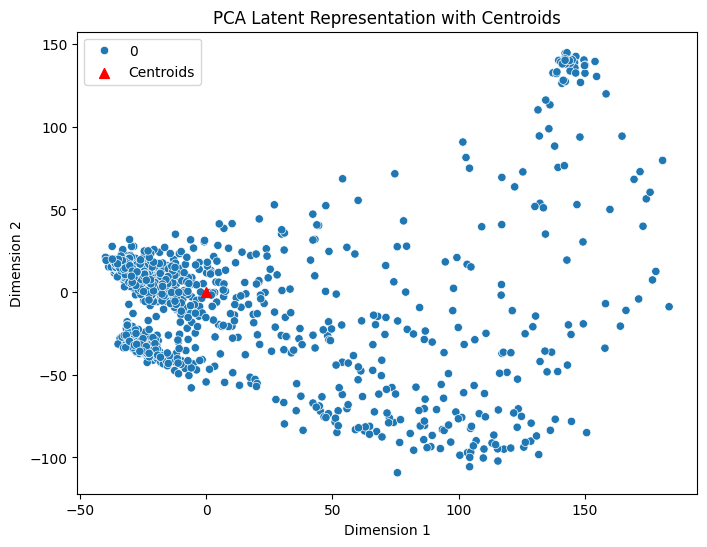

In [22]:
def plot_vector_distribution(vector_representation, kmeans_labels):
    # pca = PCA(n_components=2, random_state=0)
    # pca_result = pca.fit_transform(vector_representation)

    # df_pca = pd.DataFrame(pca_result, columns=['Dimension 1', 'Dimension 2'])
    df_pca = pd.DataFrame(vector_representation, columns=['Dimension 1', 'Dimension 2'])
    df_pca['Cluster Label'] = kmeans_labels

    cluster_palette = sns.color_palette('tab10', n_colors=len(np.unique(kmeans_labels)))
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x='Dimension 1', y='Dimension 2', hue='Cluster Label', data=df_pca, palette=cluster_palette)

    # Menambahkan centroid ke dalam plot
    centroids = []
    for label in np.unique(kmeans_labels):
        # centroid = np.mean(pca_result[kmeans_labels == label], axis=0)
        centroid = np.mean(vector_representation[kmeans_labels == label], axis=0)
        centroids.append(centroid)
    centroids = np.array(centroids)
    plt.scatter(centroids[:, 0], centroids[:, 1], marker='^', c='red', s=50, label='Centroids')

    plt.title('PCA Latent Representation with Centroids')
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')
    plt.legend()
    plt.show()

plot_vector_distribution(X, cluster_labels)

In [23]:
# Mendapatkan koordinat pusat cluster
centroid = kmeans.cluster_centers_

# Menghitung jarak antara setiap titik data dengan centroid
jarak_ke_centroid = np.sqrt(np.sum((X - centroid)**2, axis=1))

# Menentukan batas jarak yang dianggap sebagai "outscoop"
outscoop_threshold = np.mean(jarak_ke_centroid) + 2 * np.std(jarak_ke_centroid)

# Memisahkan data yang masih masuk dalam "scoop" dan "outscoop"
scoop_data = X[jarak_ke_centroid <= outscoop_threshold]
outscoop_data = X[jarak_ke_centroid > outscoop_threshold]

print(outscoop_threshold)

133.6431007385254


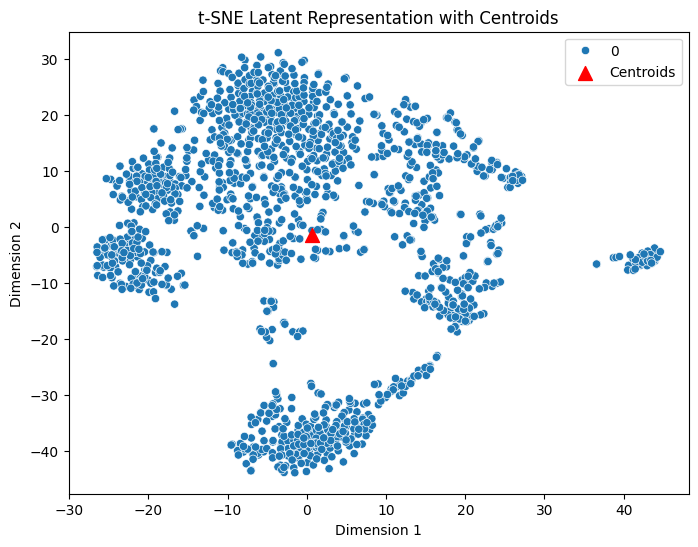

In [24]:
def plot_vector_distribution(vector_matrix, kmeans_labels):
    tsne = TSNE(random_state=0)
    tsne_result = tsne.fit_transform(vector_matrix)

    df_tsne = pd.DataFrame(tsne_result, columns=['Dimension 1', 'Dimension 2'])
    df_tsne['Cluster Label'] = kmeans_labels

    cluster_palette = sns.color_palette('tab10', n_colors=len(np.unique(kmeans_labels)))
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x='Dimension 1', y='Dimension 2', hue='Cluster Label', data=df_tsne, palette=cluster_palette)

    # Menambahkan centroid ke dalam plot
    centroids = []
    for label in np.unique(kmeans_labels):
        centroid = np.mean(tsne_result[kmeans_labels == label], axis=0)
        centroids.append(centroid)
    centroids = np.array(centroids)
    plt.scatter(centroids[:, 0], centroids[:, 1], marker='^', c='red', s=100, label='Centroids')

    plt.title('t-SNE Latent Representation with Centroids')
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')
    plt.legend()
    plt.show()

plot_vector_distribution(embeddings.reshape(embeddings.shape[0], -1), kmeans.labels_)

<ipython-input-25-f9d194638d11>:10: UserWarning: 
The palette list has fewer values (1) than needed (2) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(x='Dimension 1', y='Dimension 2', hue='Scoop Label', style='Scoop Label', data=df_pca, palette=cluster_palette, markers=['o', 'X'], legend='full')


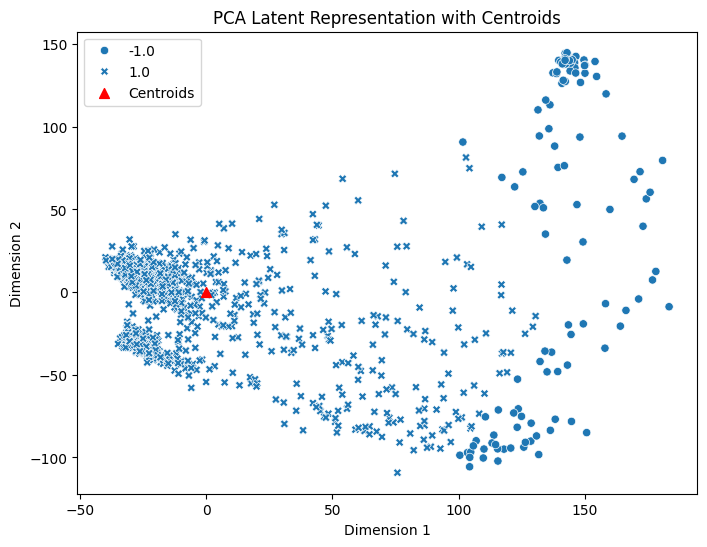

In [25]:
def plot_vector_distribution(vector_representation, kmeans_labels, scoop_labels, new_data_pca=None):
    pca = PCA(n_components=2, random_state=0)
    pca_result = pca.fit_transform(vector_representation)

    df_pca = pd.DataFrame(pca_result, columns=['Dimension 1', 'Dimension 2'])
    df_pca['Scoop Label'] = scoop_labels

    cluster_palette = sns.color_palette('tab10', n_colors=len(np.unique(kmeans_labels)))
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x='Dimension 1', y='Dimension 2', hue='Scoop Label', style='Scoop Label', data=df_pca, palette=cluster_palette, markers=['o', 'X'], legend='full')

    # Menambahkan centroid ke dalam plot
    centroids = []
    for label in np.unique(kmeans_labels):
        centroid = np.mean(pca_result[kmeans_labels == label], axis=0)
        centroids.append(centroid)
    centroids = np.array(centroids)
    plt.scatter(centroids[:, 0], centroids[:, 1], marker='^', c='red', s=50, label='Centroids')

    # Menampilkan posisi data PCA baru
    if new_data_pca is not None:
        plt.scatter(new_data_pca[:, 0], new_data_pca[:, 1], marker='s', c='black', s=50, label='New Data PCA')

    plt.title('PCA Latent Representation with Centroids')
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')
    plt.legend()
    plt.show()

    return df_pca

# Menentukan label untuk scoop dan outscoop
scoop_labels = np.ones(len(X))
scoop_labels[jarak_ke_centroid > outscoop_threshold] = -1

df_pca = plot_vector_distribution(X, kmeans.labels_, scoop_labels)

In [27]:
journal_type = 'finetuned_sinta3'

# Assuming 'jurnal_id' is a variable containing the directory name
file_path = f"/content/drive/MyDrive/skripsi/src/finetuning_sinta3/{jurnal_id}"

if not os.path.exists(file_path):
  os.mkdir(file_path)

In [28]:
import numpy as np
import joblib

# Simpan model KMeans
filename_kmeans = f"{file_path}/{jurnal_id}_kmeans.pkl"
joblib.dump(kmeans, filename_kmeans)
print("Model KMeans telah disimpan dengan nama:", filename_kmeans)

# Simpan threshold
np.save(f"{file_path}/{jurnal_id}_threshold.npy", outscoop_threshold)
print("Threshold telah disimpan.")

# Simpan data sebaran PCA
np.save(f"{file_path}/{jurnal_id}_pca_data.npy", X)
print("Data sebaran PCA telah disimpan.")

# Simpan data sebaran multibert
np.save(f"{file_path}/{jurnal_id}_bert_data.npy", embeddings.reshape(embeddings.shape[0], -1))
print("Data sebaran PCA telah disimpan.")


Model KMeans telah disimpan dengan nama: /content/drive/MyDrive/skripsi/src/finetuning_sinta3/1/1_kmeans.pkl
Threshold telah disimpan.
Data sebaran PCA telah disimpan.
Data sebaran PCA telah disimpan.


In [29]:
import pandas as pd

# Membuat DataFrame dengan data teks dan label scoop
df_res = pd.DataFrame({'Data': data,
                   'Label': scoop_labels})

# Memisahkan data dalam scoop dan outscoop
inScoop_df = df_res[df_res['Label'] == 1]
outScoop_df = df_res[df_res['Label'] == -1]

df_res.to_csv(f'{file_path}/{jurnal_id}_data_jurnal.csv')
inScoop_df.to_csv(f'{file_path}/{jurnal_id}_inscoop_data_jurnal.csv')
outScoop_df.to_csv(f'{file_path}/{jurnal_id}_outscoop_data_jurnal.csv')

print("Data dalam scoop:")
print(inScoop_df)

print("\nData outscoop:")
print(outScoop_df)

Data dalam scoop:
                                                   Data  Label
0     kemampuan bahasa inggris awal pada periode lin...    1.0
1     strengthening early childhood learning outcome...    1.0
2     eksplorasi deskriptif tentang layanan bimbinga...    1.0
3     perspektif orang tua terhadap pelaksanaan les ...    1.0
4     strategi pencegahan dan penanganan stunting mu...    1.0
...                                                 ...    ...
1842  pencapaian perkembangan anak usia dini di tama...    1.0
1843  colour ball based on microcontroller as a educ...    1.0
1844  pengembangan teknologi digital cerita sains te...    1.0
1846  pengaruh bimtek guru pembimbing khusus terhada...    1.0
1847  managing english young learners classroom acti...    1.0

[1354 rows x 2 columns]

Data outscoop:
                                                   Data  Label
21    pengembangan profil pembelajar knowledgeable d...   -1.0
53    belajar bilangan dengan konteks memasak kue bo...   -

In [30]:
from sklearn.decomposition import PCA

def fit_new_data_to_pca(new_data, pca):
    # Transformasi data baru ke ruang PCA yang sama dengan data lama
    new_data_pca = pca.transform(new_data.reshape(1, -1))

    return new_data_pca

In [31]:
def predict_scoop(text_data, tokenizer, model, kmeans_model, scoop_threshold, pca_data):
    # Preprocess title and abstract
    processed_text = preprocess_text(text_data)

    # Tokenize new data
    encoded_dict = tokenizer.encode_plus(
        processed_text,
        add_special_tokens=True,
        max_length=128,
        pad_to_max_length=True,
        return_attention_mask=True,
        return_tensors='pt'
    )

    # Calculate embedding for new data
    input_ids = encoded_dict['input_ids'].to(device)
    attention_mask = encoded_dict['attention_mask'].to(device)

    with torch.no_grad():
        outputs = model(input_ids, attention_mask=attention_mask)
        new_embedding = outputs.cpu().numpy().reshape(1, -1)

    new_data_pca = fit_new_data_to_pca(new_embedding, pca)
    print("new data :", new_data_pca, "cluster center :", kmeans_model.cluster_centers_)

    # Calculate distance to centroid
    distance_to_centroid = np.sqrt(np.sum((new_data_pca - kmeans_model.cluster_centers_)**2, axis=1))
    print("Distance", distance_to_centroid, "threshold :", scoop_threshold)
    print("inscoop", distance_to_centroid <= scoop_threshold)

    # Determine if new data is in scoop or outscoop
    if distance_to_centroid <= scoop_threshold:
        prediction = "in scoop"
    else:
        prediction = "out scoop"

    return prediction, new_data_pca

In [32]:
judul_baru = 'PAE AMDFWIE SKDFJWEI LADFK WLA DKFA IWEF MADSFLL EW IALFAS DKFEIW ALFAS'
abstrak_baru ='dsalfkejlk aslkdf ael akdf alie dlf ajefo wa jdkafl kwpa jdfj alie ajdlfk ajweil pq lsfj alwe alfj jkeaji dlf kea lt [a fpds pof  af kas l iq lkdsa jifel akt li il af laifelakai alf kalei altk alif wlak t m, aal it lakfldiafaelka df aieal'

text_data = judul_baru + abstrak_baru

# text_data = "halo test ini bukan bagian dari cluster"

# Predict scoop for new data
scoop_prediction, new_embedding = predict_scoop(text_data, tokenizer, model, kmeans, outscoop_threshold, X)
print("Prediksi scoop untuk data baru:", scoop_prediction)

new data : [[164.51273   31.785473]] cluster center : [[-5.7129569e-07  7.3749084e-07]]
Distance [167.55522] threshold : 133.6431007385254
inscoop [False]
Prediksi scoop untuk data baru: out scoop


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2760: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


<ipython-input-25-f9d194638d11>:10: UserWarning: 
The palette list has fewer values (1) than needed (2) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(x='Dimension 1', y='Dimension 2', hue='Scoop Label', style='Scoop Label', data=df_pca, palette=cluster_palette, markers=['o', 'X'], legend='full')


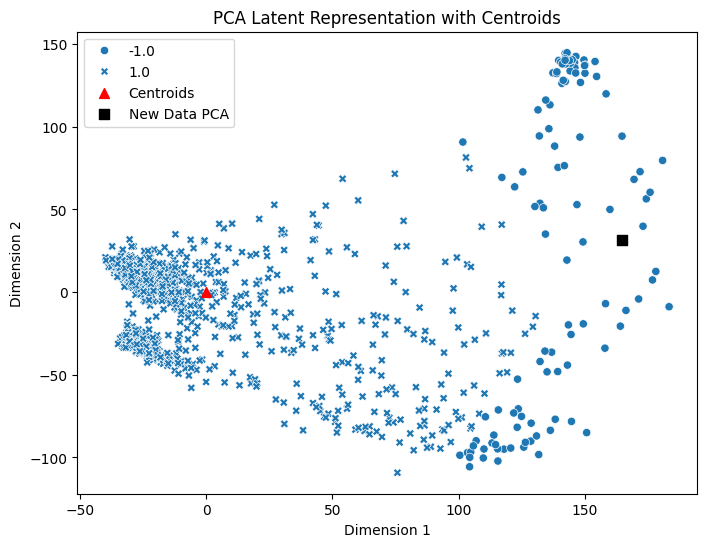

In [33]:
# Menentukan label untuk scoop dan outscoop
scoop_labels = np.ones(len(X))
scoop_labels[jarak_ke_centroid > outscoop_threshold] = -1

df_pca = plot_vector_distribution(X, kmeans.labels_, scoop_labels, new_embedding)